<a href="https://colab.research.google.com/github/KimDoye1109/AI-programming/blob/main/FLANN_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import data

img = data.chelsea()

# 이미지 복사 및 크롭
img1 = img.copy()
img1 = np.array(img1)
y1, y2, x1, x2 = 100, 300, 150, 350
img2 = img1[y1:y2, x1:x2]

In [2]:
# ORB 특징점 추출기 생성
orb = cv2.ORB_create()

# 특징점과 디스크립터 추출
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# FLANN 매처 객체 생성
index_params = dict(algorithm=6,
                    table_number=6,
                    key_size=12,
                    multi_probe_level=1)

search_params = dict(checks=50)  # 검색시 사용될 체크 수

flann = cv2.FlannBasedMatcher(index_params, search_params)

좋은 매칭 개수: 76


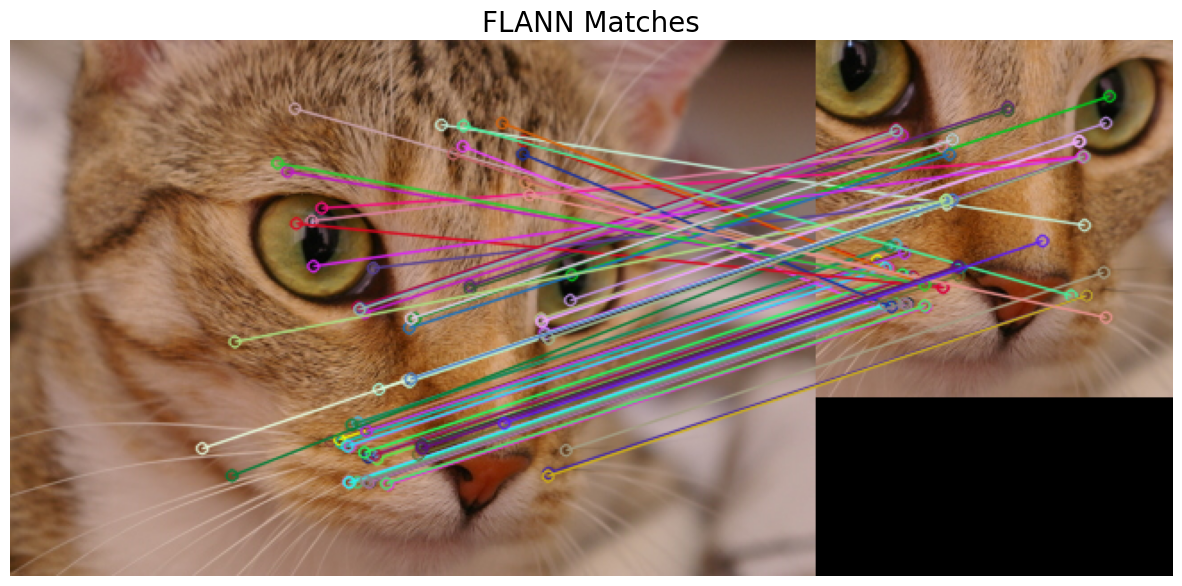

In [3]:
matches = flann.knnMatch(des1, des2, k=2)

good_matches = []

if len(matches) > 0:
    for match_pair in matches:
        if len(match_pair) == 2:
            m, n = match_pair
            if m.distance < 0.7 * n.distance:  # Lowe의 비율 테스트
                good_matches.append(m)
        #else:
            #print("두 개의 매칭이 없는 항목:", match_pair)
else:
    print("매칭 결과가 없습니다.")

# 좋은 매칭이 있을 경우 처리
if good_matches:
    print(f"좋은 매칭 개수: {len(good_matches)}")
else:
    print("유효한 좋은 매칭이 없습니다.")

# 매칭된 특징점 그리기
img_matches = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(15, 10))
plt.imshow(img_matches)
plt.title('FLANN Matches', fontsize=20)
plt.axis('off')
plt.show()
